In [26]:
import torch

# this model outputs 256 x 256 pixel images
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub',
                       'PGAN', model_name='celebAHQ-256',
                       pretrained=True, useGPU=True)

print(model)

Using cache found in /home/junwon.ko/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


Average network found !


In [12]:
for item in dir(model):
    print(item)
    print(getattr(model, item))
    print('################################################################################')

ClassificationCriterion
None
################################################################################
__class__
<class 'models.progressive_gan.ProgressiveGAN'>
################################################################################
__delattr__
<method-wrapper '__delattr__' of ProgressiveGAN object at 0x7fe478183070>
################################################################################
__dict__
{'config': <models.utils.config.BaseConfig object at 0x7fe478180970>, 'trainTmp': <models.utils.config.BaseConfig object at 0x7fe478110190>, 'useGPU': True, 'device': device(type='cuda', index=0), 'n_devices': 4, 'ClassificationCriterion': None, 'lossCriterion': <models.loss_criterions.base_loss_criterions.WGANGP object at 0x7fe478153fd0>, 'netD': DataParallel(
  (module): DNet(
    (scaleLayers): ModuleList(
      (0-2): 3 x ModuleList(
        (0-1): 2 x EqualizedConv2d(
          (module): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )

In [27]:
from models.progressive_gan import ProgressiveGAN

tmpmodel = ProgressiveGAN()

In [28]:
generator = model.getNetG()
print(generator)

GNet(
  (scaleLayers): ModuleList(
    (0-2): 3 x ModuleList(
      (0-1): 2 x EqualizedConv2d(
        (module): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (3): ModuleList(
      (0): EqualizedConv2d(
        (module): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): EqualizedConv2d(
        (module): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (4): ModuleList(
      (0): EqualizedConv2d(
        (module): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): EqualizedConv2d(
        (module): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (5): ModuleList(
      (0): EqualizedConv2d(
        (module): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): EqualizedConv2d(
        (module): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )


In [29]:
generator_ori = model.getOriginalG()
print(generator_ori)

GNet(
  (scaleLayers): ModuleList(
    (0-2): 3 x ModuleList(
      (0-1): 2 x EqualizedConv2d(
        (module): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (3): ModuleList(
      (0): EqualizedConv2d(
        (module): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): EqualizedConv2d(
        (module): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (4): ModuleList(
      (0): EqualizedConv2d(
        (module): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): EqualizedConv2d(
        (module): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (5): ModuleList(
      (0): EqualizedConv2d(
        (module): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): EqualizedConv2d(
        (module): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )


In [44]:
tmpmodel_generator = tmpmodel.getNetG().to('cuda')
print(tmpmodel_generator)

GNet(
  (scaleLayers): ModuleList()
  (toRGBLayers): ModuleList(
    (0): EqualizedConv2d(
      (module): Conv2d(512, 3, kernel_size=(1, 1), stride=(1, 1))
    )
  )
  (formatLayer): EqualizedLinear(
    (module): Linear(in_features=512, out_features=8192, bias=True)
  )
  (groupScale0): ModuleList(
    (0): EqualizedConv2d(
      (module): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
  )
  (leakyRelu): LeakyReLU(negative_slope=0.2)
  (normalizationLayer): NormalizationLayer()
)


In [31]:
print(generator.state_dict())

OrderedDict([('scaleLayers.0.0.module.weight', tensor([[[[ 0.7779,  0.4187, -0.0782],
          [ 0.4278, -1.1412, -0.0246],
          [ 0.3020, -1.0278, -0.2748]],

         [[ 0.5914, -2.0208, -0.3593],
          [ 0.3446,  0.2164, -0.8928],
          [ 0.3223,  0.4624, -1.3174]],

         [[-0.6472, -0.9164,  0.1793],
          [ 1.1481,  0.7764, -1.6299],
          [-0.4898,  0.2693, -1.5940]],

         ...,

         [[ 0.5050,  0.0936, -0.4129],
          [-0.2487,  1.4123, -0.0116],
          [ 0.5984,  0.4400,  2.1808]],

         [[-0.2132, -0.6842, -0.8569],
          [ 0.3886,  1.6462,  0.6659],
          [-0.4992,  0.8060,  1.9795]],

         [[ 0.3026, -1.5036, -1.3323],
          [ 1.0947,  0.6053, -1.7825],
          [ 0.3193, -2.1618, -0.1853]]],


        [[[ 0.9272,  0.2511,  2.1620],
          [ 0.1165, -0.2654, -1.0752],
          [ 1.0274, -1.5584,  0.7099]],

         [[-0.5178, -0.5591, -0.6623],
          [-0.3379,  1.5133,  0.4957],
          [-1.1981, -0.96

In [32]:
print(generator_ori.state_dict())

OrderedDict([('scaleLayers.0.0.module.weight', tensor([[[[-1.8898,  0.9901, -0.2800],
          [-1.4060, -0.3443,  0.4791],
          [-0.8818,  1.2801,  0.9579]],

         [[-0.1752, -1.7424, -0.3225],
          [-0.7990, -0.6890,  1.9031],
          [-0.6781,  2.1854,  1.8301]],

         [[ 1.0731,  0.3657,  0.2042],
          [-1.3983, -1.4986, -1.0968],
          [ 1.9803,  0.1113, -2.0557]],

         ...,

         [[ 0.4641,  1.0068, -0.9882],
          [ 0.7944,  1.0121, -0.0166],
          [-0.1839,  2.9451,  1.6373]],

         [[ 1.9856,  4.0050,  3.4716],
          [ 0.5147,  3.2563,  4.1740],
          [-0.0896,  4.0909,  5.0283]],

         [[ 0.6429, -0.9286,  0.1679],
          [-0.1878, -0.1952, -0.4307],
          [ 1.5266,  0.3725,  0.7086]]],


        [[[-1.9726, -0.3898,  0.2680],
          [-0.1486, -2.9847,  1.1591],
          [-2.2074, -1.6314, -0.0501]],

         [[ 0.2387,  2.8328,  0.5949],
          [ 0.6055,  0.2669, -1.0583],
          [ 0.9175, -0.29

In [33]:
print(tmpmodel_generator.state_dict())

OrderedDict([('scaleLayers.0.0.module.weight', tensor([[[[ 0.7215, -0.0880,  0.3581],
          [-1.7907, -0.8758, -0.9482],
          [ 0.2054, -2.4894,  1.2235]],

         [[-1.3678,  0.5136, -0.3258],
          [ 1.3534, -0.5212,  0.0103],
          [ 0.2077, -0.6941, -0.4381]],

         [[ 0.2594, -0.4870,  1.2172],
          [-0.1380,  1.3246, -0.2211],
          [ 2.3059, -1.0548, -2.1040]],

         ...,

         [[-0.6453, -0.1161,  1.2363],
          [-0.1697, -0.7384, -0.1667],
          [ 0.4502,  0.7540, -2.9925]],

         [[-0.1815,  0.3718, -0.3533],
          [-1.3479, -1.1703, -0.9802],
          [-1.3027, -0.8470,  0.4196]],

         [[-1.1270, -0.2084,  0.5927],
          [ 0.1680,  0.3999,  1.3534],
          [ 0.0613,  1.8501, -2.8107]]],


        [[[ 1.7999, -0.1051, -2.7245],
          [ 0.5082, -0.4817, -0.8669],
          [ 0.4209,  0.4175, -0.0729]],

         [[ 0.7845, -1.0272,  1.3741],
          [ 0.0615, -1.8657,  0.3607],
          [-0.4995,  0.08

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 256, 256])


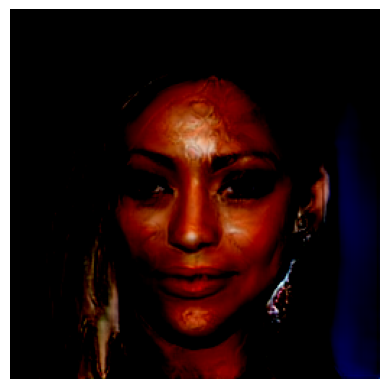

In [9]:
import numpy as np
import matplotlib.pyplot as plt

num_images = 1
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)

# Plot the generated images
plt.imshow(generated_images[0].permute(1, 2, 0))
plt.axis('off')

# Assuming generated_image is a numpy array
print(generated_images[0].shape)
# np.save('dataset/generated/progan_256.npy', generated_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 3, 256, 256)
1.0900811 -1.1412268


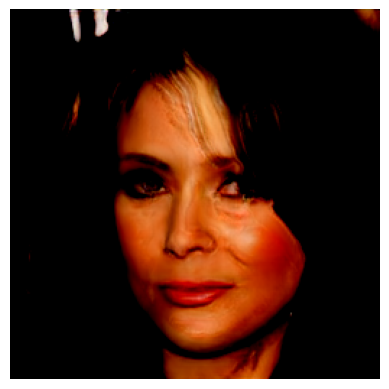

In [11]:
img = np.load('./dataset/gen/progan_256.npy')
print(img.shape)
plt.imshow(img[0].transpose(1, 2, 0))
plt.axis('off')

print(max(img[0].flatten()), min(img[0].flatten()))

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# 데이터로더
noises = torch.randn(100, 512)
dataloader = torch.utils.data.DataLoader(noises, batch_size=10, shuffle=False)
generated_images = []
generated_image = np.load('./dataset/gen/progan_256.npy')
for _ in range(10):
    generated_images.append(torch.Tensor(generated_image))
targets = torch.cat(generated_images, dim=0)
print("target shape : ", targets.shape)

# 변수
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = torch.nn.MSELoss()
num_epochs = 1000

# 모델
# model = ProgressiveGAN()
# generator = model.getNetG().to(device)

# tmpmodel_generator = model.getNetG().to('cuda')
# print(tmpmodel_generator)
generator = tmpmodel_generator
# generator_ori , generator, tmpmodel_generator
generator.train()

# 옵티마이저
optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
# optimizer = model.getOptimizerG()

for epoch in tqdm(range(num_epochs)):
    for inputs in dataloader:
        inputs = inputs.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()

        # forward pass
        outputs = generator(inputs)
              
        print(outputs.shape, targets.shape)  
        # loss
        loss = criterion(outputs, targets)

        # backward
        loss.backward()

        # update
        optimizer.step()
    
    print(f"Epoch {epoch+1}/{num_epochs} Loss: {loss.item()}")
    

target shape :  torch.Size([10, 3, 256, 256])


  0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([10, 3, 4, 4]) torch.Size([10, 3, 256, 256])


RuntimeError: The size of tensor a (4) must match the size of tensor b (256) at non-singleton dimension 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([10, 3, 256, 256])
torch.Size([3, 256, 256])


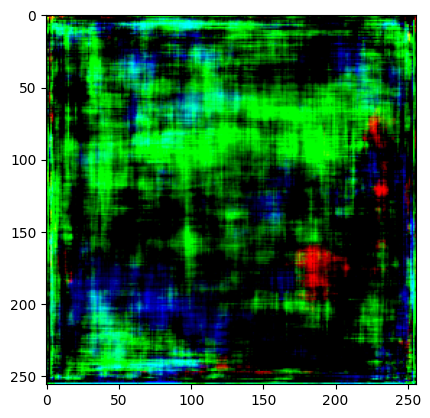

In [40]:
import matplotlib.pyplot as plt

generator = tmpmodel_generator.to('cuda')
# generator_ori
# generator
# tmpmodel_generator.to('cuda')

# 모델을 evaluation 모드로 설정
generator.eval()

# 이미지를 생성하기 위한 노이즈 생성
noise = torch.randn((10, 512), device='cuda')

# 생성된 이미지 예측
with torch.no_grad():
    outp = generator(noise).cpu()

# 이미지 시각화
print(outp.shape)
plt.imshow(outp[0].squeeze().permute(1, 2, 0))

In [39]:
import os
from PIL import Image

data_root = './dataset'
pretrained_generator = 'scratch'
train_with = 'real'
target_image_path = f'{train_with}_cat_0000.png'
img_path = os.path.join(data_root, train_with, target_image_path)

generated_image = np.array(Image.open(img_path))
generated_image = generated_image.transpose(2, 0, 1)

generated_image = (generated_image - np.min(generated_image)) / (np.max(generated_image) - np.min(generated_image))
generated_image = (generated_image * 2) - 1
generated_images = []
for _ in range(10):
    if len(generated_image.shape) == 4:
        generated_images.append(torch.Tensor(generated_image))
    elif len(generated_image.shape) == 3:
        generated_images.append(torch.Tensor(generated_image[np.newaxis, :]))
    elif len(generated_image.shape) == 2:
        generated_images.append(torch.Tensor(generated_image[np.newaxis, np.newaxis, :]))
    else:
        raise ValueError("Invalid image shape")
targets = torch.cat(generated_images, dim=0)
print("target shape : ", targets.shape)

target shape :  torch.Size([10, 3, 256, 256])


In [25]:
import lpips
import numpy as np
# Initialize the LPIPS loss function
loss_fn = lpips.LPIPS(net='vgg').to('cuda')
def lpips_loss(input, target):
    return loss_fn(input, target)

import matplotlib.pyplot as plt

# Generate random noise
o1 = torch.Tensor(np.random.rand(10, 3, 256, 256)).to('cuda')
o2 = torch.Tensor(np.random.rand(10, 3, 256, 256)).to('cuda')

print(lpips_loss(o1, o2))
print(lpips_loss(o1, o2).mean().item())

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /opt/conda/lib/python3.10/site-packages/lpips/weights/v0.1/vgg.pth
tensor([[[[0.3884]]],


        [[[0.3851]]],


        [[[0.3870]]],


        [[[0.3884]]],


        [[[0.3896]]],


        [[[0.3801]]],


        [[[0.3848]]],


        [[[0.3859]]],


        [[[0.3793]]],


        [[[0.3797]]]], device='cuda:0', grad_fn=<AddBackward0>)

0.3848245441913605
